## Project Summary: Recipe Recommendation System

This project aims to build a robust recipe recommendation system by employing Exploratory Data Analysis (EDA), Natural Language Processing (NLP), sentence transformers, and cosine similarity. The system will take user-provided ingredients as input and leverage NLP techniques, along with sentence embeddings and cosine similarity, to offer personalized recommendations. The focus lies on understanding the dataset through EDA, transforming recipe descriptions into meaningful embeddings using sentence transformers, and employing cosine similarity to match user-input ingredients with the most relevant recipes. The ultimate goal is to provide users with a curated list of the top 10 recipe suggestions tailored to their specified ingredients.

In [1]:
# Import the needed libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import string
import re

from collections import Counter
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Import the data and explore it:

In [2]:
data_set_1 = pd.read_json('recipes_raw_nosource_ar.json', orient='index')
data_set_2 = pd.read_json('recipes_raw_nosource_epi.json', orient='index')
data_set_3 = pd.read_json('recipes_raw_nosource_fn.json', orient='index')

recipe_data = pd.concat([data_set_1, data_set_2, data_set_3])

In [3]:
# Display the first few rows
recipe_data.head()

,picture_link,title,ingredients,instructions
rmK12Uau.ntP510KeImX506H6Mr6jTu,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,NaN,NaN,NaN
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,YCnbhplMgiraW4rUXcybgSEZinSgljm,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


In the cell above we can see what our dataset contains. So first we will check for missing values and after that we will reset the indexing, after that we want to drop the picture_link column and at the end we will do some data preprocessing. 

In [4]:
# Let's check the missing values of the dataset and drop them if any:
recipe_data.isna().sum()

picture_link    42054
title              53
ingredients         1
instructions      175
dtype: int64

In [5]:
# Drop the missin g values:
recipe_data.dropna(inplace=True)

#Check if we did it properly:
recipe_data.isna().sum()

picture_link    0
title           0
ingredients     0
instructions    0
dtype: int64

### Lets first fix the index column and make it understandable:

First we will reset the index of the dataset and then will drop the old indexing.

In [6]:
# Reset the index of the dataset
recipe_data = recipe_data.reset_index()

# Drop the old indexing of the dataset
recipe_data.drop('index', axis=1, inplace=True)

# Let's see what we haev done
recipe_data.head()

,picture_link,title,ingredients,instructions
0,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
1,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
2,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
3,YCnbhplMgiraW4rUXcybgSEZinSgljm,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...
4,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,Banana Banana Bread,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...",Preheat oven to 350 degrees F (175 degrees C)....


Here i see that we have picture links which i will unfortunatly drop, because we will not be using them for our project.

In [7]:
recipe_data.drop('picture_link', axis=1, inplace=True)
recipe_data.head()

,title,ingredients,instructions
0,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
1,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
2,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
3,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...
4,Banana Banana Bread,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...",Preheat oven to 350 degrees F (175 degrees C)....


In the cell above what catches my attention is that we have the word `ADVERTISEMENT` in our data set, we will need to remove it in order to have better results.

### Exploratory Data Analysis (EDA):

**Ingredient Frequency Bar Chart:** Display a bar chart showing the most frequently occurring ingredients. This can help identify common elements in recipes.

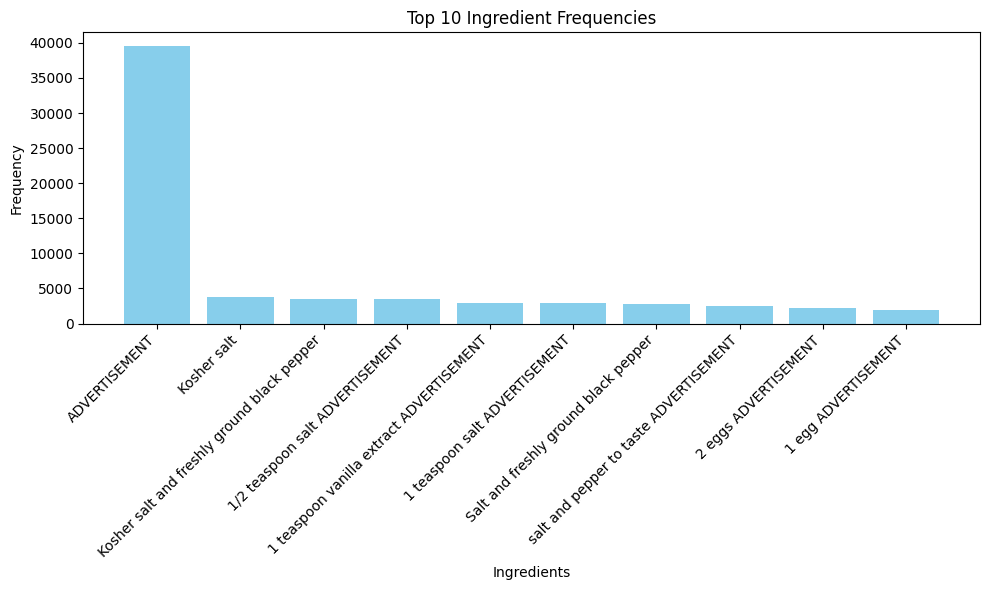

In [8]:
# Create a list with all the ingredients:
all_ingredients = [ingredient for sublist in recipe_data['ingredients'] for ingredient in sublist]

# Count the occurrences of each ingredient:
ingredient_counts = Counter(all_ingredients)

# Get the top N ingredients and their frequencies:
top_n = 10  # You can adjust this value based on your preferences
top_ingredients = [item[0] for item in ingredient_counts.most_common(top_n)]
frequency = [item[1] for item in ingredient_counts.most_common(top_n)]

# Plot the bar chart:
plt.figure(figsize=(10, 6))
plt.bar(top_ingredients, frequency, color='skyblue')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top {} Ingredient Frequencies'.format(top_n))
plt.xticks(rotation=45, ha='right')  # Rotate ingredient names for better readability
plt.tight_layout()
plt.show()

## Remove advertisements:

In [9]:
# Here i take the ingredients column and remove the "ADVERTISEMENT" word from the text inside.
recipe_data['ingredients'] = recipe_data['ingredients'].apply(lambda x: [element.replace('ADVERTISEMENT', '') for element in x])

In [10]:
# Filtering all the values in the list so we don't have any empty strings:
recipe_data['ingredients'] = recipe_data['ingredients'].apply(lambda x: [item for item in x if item != ''])

## Word Cloud:

Word clouds are a visual representation of text data where the size of each word corresponds to its frequency or importance in the given text. 

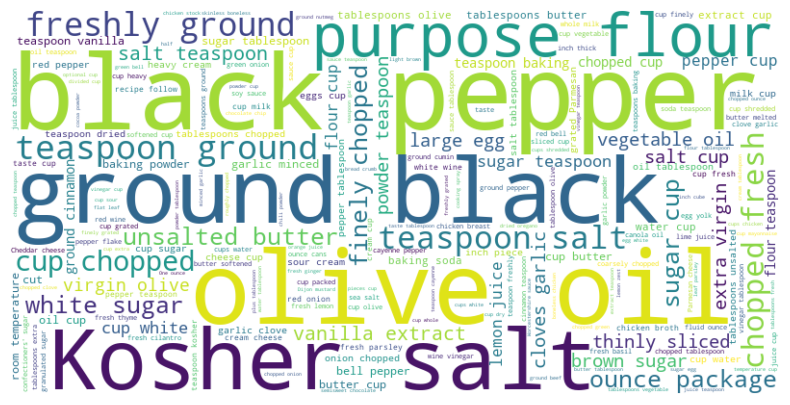

In [11]:
all_text = ' '.join(recipe_data['ingredients'].apply(lambda x: ' '.join(x)))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Remove special symbols:

First let's visualise the special symbols through the columns of our data.

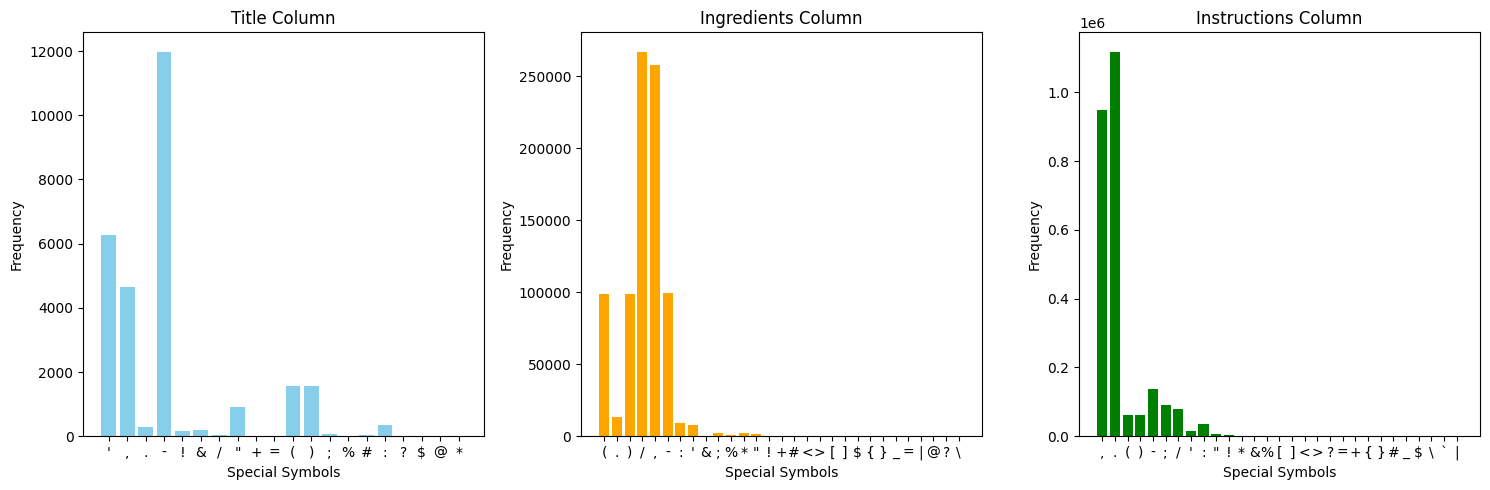

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for column1
all_text_col1 = ' '.join(recipe_data['title'])
special_symbols_col1 = [char for char in all_text_col1 if char in string.punctuation]
symbol_counts_col1 = Counter(special_symbols_col1)
axes[0].bar(symbol_counts_col1.keys(), symbol_counts_col1.values(), color='skyblue')
axes[0].set_xlabel('Special Symbols')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Title Column')

# Plot for column2
all_text_col2 = ' '.join(recipe_data['ingredients'].apply(lambda x: ' '.join(x)))
special_symbols_col2 = [char for char in all_text_col2 if char in string.punctuation]
symbol_counts_col2 = Counter(special_symbols_col2)
axes[1].bar(symbol_counts_col2.keys(), symbol_counts_col2.values(), color='orange')
axes[1].set_xlabel('Special Symbols')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Ingredients Column')

# Plot for column3
all_text_col3 = ' '.join(recipe_data['instructions'])
special_symbols_col3 = [char for char in all_text_col3 if char in string.punctuation]
symbol_counts_col3 = Counter(special_symbols_col3)
axes[2].bar(symbol_counts_col3.keys(), symbol_counts_col3.values(), color='green')
axes[2].set_xlabel('Special Symbols')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Instructions Column')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In the function below i remove all the special symbols except the `/`, `(` and `)`. Because they hold meaning in the recipes.

In [13]:
def remove_special_symbols(text):
    # Using regular expression to remove non-alphanumeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\/()]', '', text)
    return cleaned_text

In [14]:
# Remove the special symbols in the title column:
recipe_data['title'] = recipe_data['title'].apply(lambda x: remove_special_symbols(x))

# Remove the special symbols in the ingredients column:
recipe_data['ingredients'] = recipe_data['ingredients'].apply(lambda x: [remove_special_symbols(element) for element in x])

# Remove the special symbols in the instructions column:
recipe_data['instructions'] = recipe_data['instructions'].apply(lambda x: remove_special_symbols(x))

## Create a column with all the text from the recipe:

Having a consolidated text column allows you to perform text analysis and natural language processing tasks more efficiently. I also think it will make our work easier.

In [15]:
recipe_data['full_text'] = ('Recipe title: ' + recipe_data['title']
                            + '. Ingredients: ' + recipe_data['ingredients'].apply(lambda x: ';'.join(x))
                            + '. Instructions: ' + recipe_data['instructions'])

## Remove stopwords:

The removal of stop words in natural language processing (NLP) is a common preprocessing step in text analysis tasks. Stop words are words that are commonly used in a language but are generally considered to carry little meaning or contribute little to the overall understanding of a text. Examples of stop words in English include "the," "and," "is," "in," and "of."

In [16]:
def remove_stopwords(input_string):
    # Tokenize the input string into words
    words = word_tokenize(input_string)

    # Remove English stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_string = ' '.join(filtered_words)

    return filtered_string

In [17]:
# Removes the stopwords and returns the text in lowercase. 
recipe_data['full_text'] = recipe_data['full_text'].apply(lambda x: remove_stopwords(x.lower()))

In [18]:
recipe_data.head()

,title,ingredients,instructions,full_text
0,Awesome Slow Cooker Pot Roast,[2 (1075 ounce) cans condensed cream of mushro...,In a slow cooker mix cream of mushroom soup dr...,recipe title : awesome slow cooker pot roast ....
1,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar , 1/2 cup ketchup ...",Preheat oven to 350 degrees F (175 degrees C) ...,recipe title : brown sugar meatloaf . ingredie...
2,Best Chocolate Chip Cookies,"[1 cup butter softened , 1 cup white sugar , 1...",Preheat oven to 350 degrees F (175 degrees C)\...,recipe title : best chocolate chip cookies . i...
3,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta , 3 cups fr...",Preheat oven to 350 degrees F Line a 2quart ca...,recipe title : homemade mac cheese casserole ....
4,Banana Banana Bread,"[2 cups allpurpose flour , 1 teaspoon baking s...",Preheat oven to 350 degrees F (175 degrees C) ...,recipe title : banana banana bread . ingredien...


## Check for duplicates and remove if any:

We will check for duplicated data and remove it if we have, because it will slow our work and at the end when we want to give a recommendation we might get twice the same recipe.

In [19]:
# Check for duplicates in 'title' column
duplicates = recipe_data['full_text'].duplicated().sum()
print(f'Number of duplicates: {duplicates}')

# Drop the duplicates:
recipe_data = recipe_data.drop_duplicates('full_text')

#Show the result of droping the duplicates:
removed_duplicates = recipe_data['full_text'].duplicated().sum()
print(f'Number of dupliactes after dropping them: {removed_duplicates}')

Number of duplicates: 341
Number of dupliactes after dropping them: 0


## Remove punctuation:

Removing punctuation is a common preprocessing step in natural language processing (NLP) tasks, and it serves several purposes:
* Simplifies Tokenization
* Reduces Dimensionality
* Improves Consistency

In [20]:
# This is a simple function that get's text and removes the punctuation of it.
def remove_punctuation(text):
    cleaned_text = ''.join([i for i in text if i not in string.punctuation])

    return cleaned_text

In [21]:
# Implementing the `remove_punctuation` function on the 'full_text' column
recipe_data['full_text'] = recipe_data['full_text'].apply(lambda x: remove_punctuation(x))
recipe_data.head()

,title,ingredients,instructions,full_text
0,Awesome Slow Cooker Pot Roast,[2 (1075 ounce) cans condensed cream of mushro...,In a slow cooker mix cream of mushroom soup dr...,recipe title awesome slow cooker pot roast i...
1,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar , 1/2 cup ketchup ...",Preheat oven to 350 degrees F (175 degrees C) ...,recipe title brown sugar meatloaf ingredient...
2,Best Chocolate Chip Cookies,"[1 cup butter softened , 1 cup white sugar , 1...",Preheat oven to 350 degrees F (175 degrees C)\...,recipe title best chocolate chip cookies ing...
3,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta , 3 cups fr...",Preheat oven to 350 degrees F Line a 2quart ca...,recipe title homemade mac cheese casserole i...
4,Banana Banana Bread,"[2 cups allpurpose flour , 1 teaspoon baking s...",Preheat oven to 350 degrees F (175 degrees C) ...,recipe title banana banana bread ingredients...


### Let's see the most frequent words across the 'full_text' column

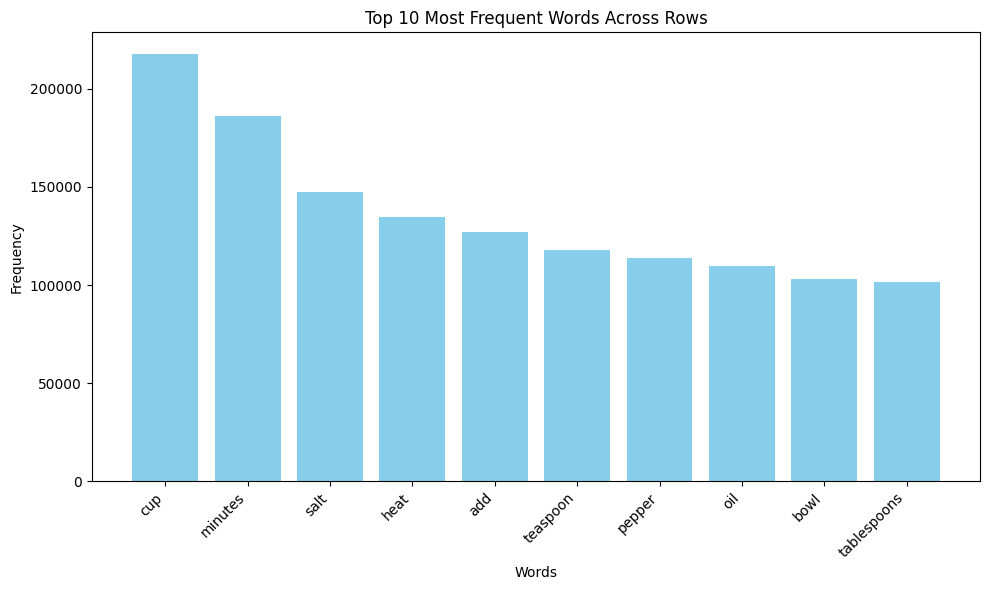

In [22]:
def plot_top_words(dataframe, column_name='full_text', top_n=10):
    # Combine all words from the 'full_text' column into a single string
    all_words = ' '.join(dataframe[column_name].astype(str).tolist())

    # Split the string into individual words
    words = [word.lower() for word in all_words.split() if not any(char.isdigit() for char in word)]

    # Calculate the frequency of each non-digit word
    word_counts = Counter(words)

    # Get the top N words and their frequencies
    top_words = word_counts.most_common(top_n)

    # Extract words and frequencies for plotting
    words, frequencies = zip(*top_words)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent Words Across Rows')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_top_words(recipe_data)

In the plot above i can't see anything unusual, so i think it's enough preprocessing of the data, let's continue to embedding it and testing the accuracy.

## Save the preprocessed data:

Now let's save the preprocessed data so we don't have to prepare it for work every time we want to use the model.

In [23]:
recipe_data.to_csv('preprocessed_recipe_data.csv', index=False)